In [1]:
import pandas as pd
store = pd.HDFStore("q5-20230713171410-4a3ce892204ccfd0c8cbc55456371ce3.h5")

/home/grosinosky/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/grosinosky/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [19]:
display(store.keys())

['/container_cpu_usage_seconds_total',
 '/container_memory_usage_bytes',
 '/flink_taskmanager_job_task_backPressuredTimeMsPerSecond',
 '/flink_taskmanager_job_task_busyTimeMsPerSecond',
 '/flink_taskmanager_job_task_idleTimeMsPerSecond',
 '/flink_taskmanager_job_task_numRecordsIn',
 '/flink_taskmanager_job_task_numRecordsOut',
 '/flink_taskmanager_job_task_operator_pendingRecords']

In [20]:
df = store["/flink_taskmanager_job_task_busyTimeMsPerSecond"]
df["from_beginning"] = df.index - df.index.min()
df.index = df["from_beginning"]

In [21]:
display(df.columns.str.extract(r'task_name="([^"]+)"', expand=False).unique())

Index([                                                                                                                                                                                                                       'Calc_select__w_start_AS_starttime__w_end_AS_endtime__num__',
                                                                                                                                                                                                'Sink:_Sink_table__default_catalog_default_database_discard_sink___fields__auction__num__',
                                                                                                                                                                                             'GroupAggregate_groupBy__starttime__endtime___select__starttime__endtime__MAX_num__AS_maxn__',
       'GroupWindowAggregate_groupBy___f0___window__SlidingGroupWindow__w___dateTime__10000__2000____properties__w_start__w_end__w_rowtime__w_procti

In [22]:
df = df[df.index > pd.Timedelta(seconds=120)] # begin after the "warmup" period
df = df[df.index < pd.Timedelta(seconds=300-30)] # limit to the actual duration of the experiment

Index(['flink_taskmanager_job_task_busyTimeMsPerSecond{cluster="nexmark-flink",component="taskmanager",container="taskmanager",endpoint="prom",host="10_42_11_16",instance="10.42.11.16:9249",job="default/flink-pod-monitor",job_id="4a3ce892204ccfd0c8cbc55456371ce3",job_name="regression_results__q5_20230713171410_1000000_0",namespace="default",pod="nexmark-flink-taskmanager-4",subtask_index="17",task_attempt_id="f4d313a6a67ab78e10146dd834b391c0",task_attempt_num="0",task_id="ea632d67b7d595e5b851708ae9ad79d6",task_name="GroupWindowAggregate_groupBy___f0___window__SlidingGroupWindow__w___dateTime__10000__2000____properties__w_start__w_end__w_rowtime__w_proctime___select___f0__COUNT____AS_num__start__w___AS_w_start__end__w___AS_w_end__rowtime__w___AS_w_rowtime__proctime__w___AS_w_proctime__",tm_id="10_42_11_16:6122_c9e457"}',
       'flink_taskmanager_job_task_busyTimeMsPerSecond{cluster="nexmark-flink",component="taskmanager",container="taskmanager",endpoint="prom",host="10_42_11_16",instan

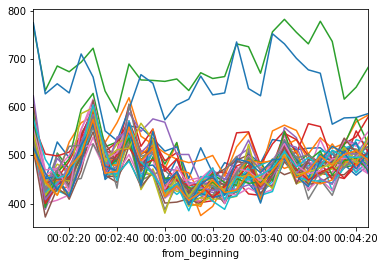

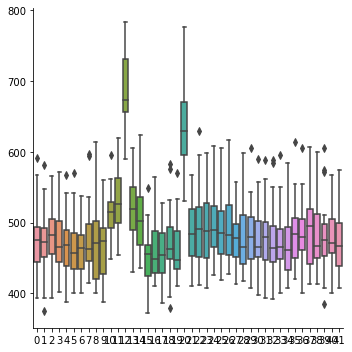

In [23]:
import matplotlib.pyplot as plt
import re
import seaborn as sns
df2 = df.filter(regex=r'.*task_name="GroupWindowAggregate.*', axis=1)

fig, ax = plt.subplots()
df2.plot(ax=ax, legend=False)

#df2 = df2.mean(axis=1)
#fig, ax = plt.subplots()
#import seaborn as sns
display(df2.columns)
for i, c in enumerate(df2.columns):
    df2= df2.rename(columns={c: "{}".format(i)})
    
sns.catplot(data=df2, kind="box")
